In [1]:
PROJECT   = 'pide23f7ea9d71'
READ_KEY  = 'd5c81802-a1f6-46a2-ad31-8be10d7172f4'

URL = "https://cenote.sidero.services/api/projects/" + PROJECT

import requests

def cenote_get(event_name, query_type, query_dict={}):
    get_url = "{0}/queries/{1}".format(URL, query_type)
    query_dict["readKey"] = READ_KEY
    query_dict["event_collection"] = event_name
    r = requests.get(get_url, query_dict)
    r = dict(r.json())
    if r["ok"]:
        return r["results"]
    else:
        raise RuntimeError("Query unsuccessful due to {0}. Message is: {1}".format(
            r["results"], r["message"]))
        
import pandas

# Custom filter on extraction to get data from a given sensor only
cus_filter = '[{"property_name":"un","operator":"eq","property_value":"ADU-700HP_V2"}]'
res = cenote_get("measurements", "extraction", {"filters": cus_filter, "latest": 50000})

# Transform query result to a pandas DataFrame
df = pandas.DataFrame(res)
df = df.sort_values(by="epoch").drop_duplicates(subset="epoch").reset_index(drop=True)

# Convert keys
df = df.convert_dtypes()
keys = ['solar', 'precipitation', 'windspeed', 'winddirection', 'temperature', 'humidity', 
        'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2', 'analogv1', 'cntv1',
        'analogv3', 'cntv3', 'cntvm']

for key in keys:
    df[key] = pandas.to_numeric(df[key], errors="coerce")

df.epoch = pandas.to_datetime(df.epoch, unit='ms')

import numpy as np

df.loc[df.temperature < -100, ('temperature')] = np.nan
for key in ["windspeed", "winddirection", "temperature", "humidity"]:
    df.loc[df[key] < 0, (key)] = np.nan

In [2]:
df

,filename,f,pn,uid,un,dt,ch,gps,epoch,solar,...,uuid,cenote$created_at,cenote$timestamp,cenote$id,ai21temp,ai22rh,ai23cnt1,ai31level,ai32cnt1,unknown16
0,ADU-700HP_V2_200417022030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,16/04/2020 20:25:24,18,0,2020-04-16 20:30:24,0.0,...,5c27ef34-75f4-4d22-a1e6-d6e3e6ac336e,1602993286439,1602993286439,d26d21b7-79ab-4dc0-a7fe-b9e494bf3542,None,None,None,None,None,<NA>
1,ADU-700HP_V2_200417022030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,16/04/2020 20:25:24,18,0,2020-04-16 20:35:24,0.0,...,52682d0e-787e-4ba0-abf1-51536fe54131,1602993286511,1602993286511,f74937fe-d5ac-42e7-930a-2f68386c6a45,None,None,None,None,None,<NA>
2,ADU-700HP_V2_200417022030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,16/04/2020 20:25:24,18,0,2020-04-16 20:40:24,0.0,...,cd06b199-8a97-4dca-acce-004cf376e64a,1602993286582,1602993286582,05363c28-423c-48b4-b1e2-b58643ed0d85,None,None,None,None,None,<NA>
3,ADU-700HP_V2_200417022030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,16/04/2020 20:25:24,18,0,2020-04-16 20:45:24,0.0,...,c89803af-344d-4bd9-828b-c7104646593c,1602993286654,1602993286654,224d5cea-db64-49bf-a968-d66f379ca96f,None,None,None,None,None,<NA>
4,ADU-700HP_V2_200417022030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,16/04/2020 20:25:24,18,0,2020-04-16 20:50:24,0.0,...,450f41be-cca0-4a13-bffe-c91181a2f531,1602993286725,1602993286725,9156af2f-7e32-44de-96bc-7be26afe2703,None,None,None,None,None,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,ADU-700HP_V2_201021164530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,21/10/2020 10:50:24,18,0,2020-10-21 13:30:24,362.0,...,b0e19361-7ab3-4af1-b15a-2c9285213209,1603288189429,1603288189429,634bbe33-6828-4da6-b8b9-4db2d220c3ac,None,None,None,None,None,<NA>
49996,ADU-700HP_V2_201021164530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,21/10/2020 10:50:24,18,0,2020-10-21 13:35:24,350.0,...,f254fcf0-b1d6-4397-a12a-de43824ea300,1603288189765,1603288189765,be754dfc-14a8-47fd-a5a4-215061cdf559,None,None,None,None,None,<NA>
49997,ADU-700HP_V2_201021164530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,21/10/2020 10:50:24,18,0,2020-10-21 13:40:24,341.0,...,4fb1b526-a71c-4229-8a92-2761eb3edf06,1603288190064,1603288190064,899bdb1a-1e68-45d0-9dde-77d624c5b858,None,None,None,None,None,<NA>
49998,ADU-700HP_V2_201021164530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,21/10/2020 10:50:24,18,0,2020-10-21 13:45:24,318.0,...,648eca98-68aa-4779-b789-dc80a8baa80d,1603288190334,1603288190334,b3eebe06-6518-4f90-a451-7e32809172af,None,None,None,None,None,<NA>


In [3]:
df.columns

Index(['filename', 'f', 'pn', 'uid', 'un', 'dt', 'ch', 'gps', 'epoch', 'solar',
       'precipitation', 'windspeed', 'winddirection', 'temperature',
       'humidity', 'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2',
       'analogv1', 'cntv1', 'analogv3', 'cntv3', 'cntvm', 'uuid',
       'cenote$created_at', 'cenote$timestamp', 'cenote$id', 'ai21temp',
       'ai22rh', 'ai23cnt1', 'ai31level', 'ai32cnt1', 'unknown16'],
      dtype='object')

# Weather forecast

## Build a meteo DataFrame

### Select only the relevant features (columns)

In [4]:
meteo_df = df[['epoch', 'solar', 'precipitation', 'windspeed', 'winddirection', 'humidity', 'temperature']]
meteo_df

,epoch,solar,precipitation,windspeed,winddirection,humidity,temperature
0,2020-04-16 20:30:24,0.0,0.0,0.65,45.6,0.859,6.8
1,2020-04-16 20:35:24,0.0,0.0,0.51,69.0,0.868,6.6
2,2020-04-16 20:40:24,0.0,0.0,0.61,102.3,0.865,6.6
3,2020-04-16 20:45:24,0.0,0.0,0.67,62.7,0.875,6.5
4,2020-04-16 20:50:24,0.0,0.0,0.55,71.9,0.848,6.6
...,...,...,...,...,...,...,...
49995,2020-10-21 13:30:24,362.0,0.0,1.79,228.3,0.459,21.1
49996,2020-10-21 13:35:24,350.0,0.0,2.00,212.8,0.462,21.3
49997,2020-10-21 13:40:24,341.0,0.0,2.18,216.5,0.462,21.1
49998,2020-10-21 13:45:24,318.0,0.0,1.86,230.1,0.458,21.1


### Resample to 3 hours

In [5]:
meteo_df = meteo_df.set_index("epoch").resample("3H").mean()
meteo_df

,solar,precipitation,windspeed,winddirection,humidity,temperature
epoch,,,,,,
2020-04-16 18:00:00,0.000000,0.0,0.635000,76.016667,0.860833,6.600000
2020-04-16 21:00:00,0.000000,0.0,1.212500,100.083333,0.881333,6.111111
2020-04-17 00:00:00,0.000000,0.0,0.835833,93.791667,0.889333,4.950000
2020-04-17 03:00:00,0.000000,0.0,1.037778,96.097222,0.906833,5.291667
2020-04-17 06:00:00,0.000000,0.0,1.198611,224.836111,0.727333,13.747222
...,...,...,...,...,...,...
2020-10-21 00:00:00,0.000000,0.0,0.666571,111.862857,0.861171,8.554286
2020-10-21 03:00:00,15.388889,0.0,0.549444,137.291667,0.912278,7.786111
2020-10-21 06:00:00,298.444444,0.0,1.177222,201.219444,0.797111,14.911111


## Build a dataset --- predict given the current settings the temperature in 3 hours!

In [6]:
dataset_df = meteo_df.copy(deep=True)

### Extra feature: hour in 24 hour format

In [7]:
dataset_df.loc[:, ("hour")] = [obj.hour for obj in meteo_df.index.time]
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour
epoch,,,,,,,
2020-04-16 18:00:00,0.000000,0.0,0.635000,76.016667,0.860833,6.600000,18
2020-04-16 21:00:00,0.000000,0.0,1.212500,100.083333,0.881333,6.111111,21
2020-04-17 00:00:00,0.000000,0.0,0.835833,93.791667,0.889333,4.950000,0
2020-04-17 03:00:00,0.000000,0.0,1.037778,96.097222,0.906833,5.291667,3
2020-04-17 06:00:00,0.000000,0.0,1.198611,224.836111,0.727333,13.747222,6
...,...,...,...,...,...,...,...
2020-10-21 00:00:00,0.000000,0.0,0.666571,111.862857,0.861171,8.554286,0
2020-10-21 03:00:00,15.388889,0.0,0.549444,137.291667,0.912278,7.786111,3
2020-10-21 06:00:00,298.444444,0.0,1.177222,201.219444,0.797111,14.911111,6


### Add a column with the future temperature (the target variable)

In [8]:
future_temp = dataset_df.temperature.tolist()
# Delete the first element to offset all by one ...
future_temp = future_temp[1:]
# Delete the last row of dataset_df as we have no target for it ...
dataset_df.drop(dataset_df.tail(1).index,inplace=True)
# And now add the target!
dataset_df.loc[:, ('future_temperature')] = future_temp
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-16 18:00:00,0.000000,0.0,0.635000,76.016667,0.860833,6.600000,18,6.111111
2020-04-16 21:00:00,0.000000,0.0,1.212500,100.083333,0.881333,6.111111,21,4.950000
2020-04-17 00:00:00,0.000000,0.0,0.835833,93.791667,0.889333,4.950000,0,5.291667
2020-04-17 03:00:00,0.000000,0.0,1.037778,96.097222,0.906833,5.291667,3,13.747222
2020-04-17 06:00:00,0.000000,0.0,1.198611,224.836111,0.727333,13.747222,6,17.444444
...,...,...,...,...,...,...,...,...
2020-10-20 21:00:00,0.000000,0.0,0.745278,101.886111,0.780972,10.372222,21,8.554286
2020-10-21 00:00:00,0.000000,0.0,0.666571,111.862857,0.861171,8.554286,0,7.786111
2020-10-21 03:00:00,15.388889,0.0,0.549444,137.291667,0.912278,7.786111,3,14.911111


In [9]:
dataset_df = dataset_df.dropna()
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-16 18:00:00,0.000000,0.0,0.635000,76.016667,0.860833,6.600000,18,6.111111
2020-04-16 21:00:00,0.000000,0.0,1.212500,100.083333,0.881333,6.111111,21,4.950000
2020-04-17 00:00:00,0.000000,0.0,0.835833,93.791667,0.889333,4.950000,0,5.291667
2020-04-17 03:00:00,0.000000,0.0,1.037778,96.097222,0.906833,5.291667,3,13.747222
2020-04-17 06:00:00,0.000000,0.0,1.198611,224.836111,0.727333,13.747222,6,17.444444
...,...,...,...,...,...,...,...,...
2020-10-20 21:00:00,0.000000,0.0,0.745278,101.886111,0.780972,10.372222,21,8.554286
2020-10-21 00:00:00,0.000000,0.0,0.666571,111.862857,0.861171,8.554286,0,7.786111
2020-10-21 03:00:00,15.388889,0.0,0.549444,137.291667,0.912278,7.786111,3,14.911111


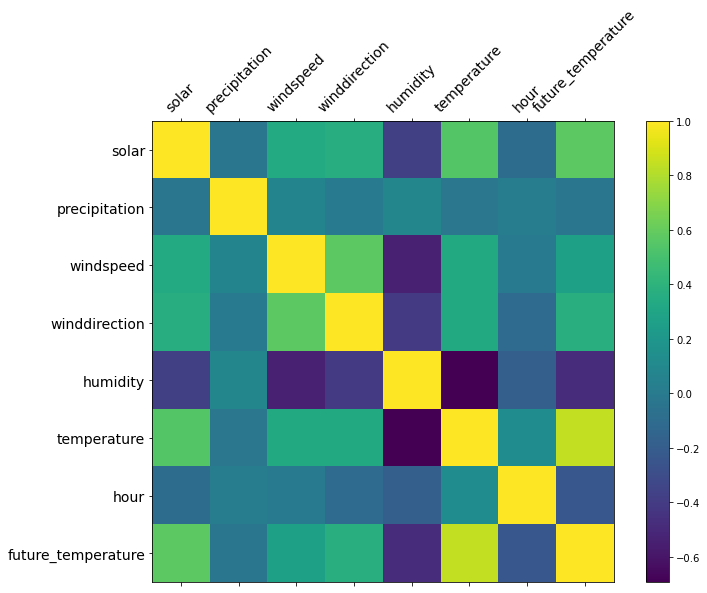

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(11.69, 8.27))
plt.matshow(dataset_df.corr(), fignum=f.number)
plt.xticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14)
cb = plt.colorbar()

## Use scikit-learn to build a model


[sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

### Create numpy arrays 

In [11]:
X = dataset_df.loc[:, dataset_df.columns != 'future_temperature'].to_numpy()
y = dataset_df.loc[:, dataset_df.columns == 'future_temperature'].to_numpy().flatten()
y

array([ 6.11111111,  4.95      ,  5.29166667, ..., 14.91111111,
       20.27222222, 21.34347826])

### Split the data to training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2020)

In [13]:
print("Training size: {0}\n Testing size: {1}".format(
    len(y_train), len(y_test)))

Training size: 929
 Testing size: 459


### Build a model

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_hat = reg.predict(X_test)

### Validate --- Model assessment

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print("RMSE: {0:.2f}, R2: {1:.2f}".format( 
      sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat)),
      r2_score(y_true=y_test, y_pred=y_hat)
     ))

RMSE: 2.30, R2: 0.83


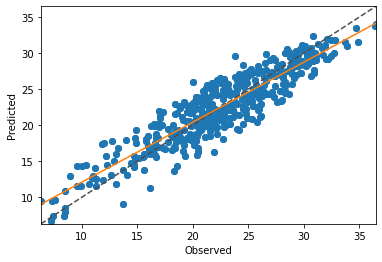

In [16]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_hat, 'o')

axis_min = min(min(y_test), min(y_hat))
axis_max = max(max(y_test), max(y_hat))

plt.scatter(y_test, y_hat, linestyle="None", marker="o")
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([axis_min, axis_max], [axis_min, axis_max], ls="--", c=".3")
m, b = np.polyfit(y_test, y_hat, 1)
step = (axis_max - axis_min ) / 100
x_lsq = np.arange(axis_min, axis_max+step, step)
plt.plot(x_lsq, [i * m + b for i in x_lsq], '-')